# Automating figures from data

One of the biggest advantages of Matplotlib is its ability to adapt flexibly when it is given different inputs. With the right approach, visualizations can be created in a way that responds automatically to the data being used.

Automation allows functions and programs to adjust their behavior based on the data provided. This makes the process faster and more efficient, since you no longer need to manually redo steps every time the data changes. It also ensures consistency and reproducibility, which is one of the main strengths of using Python and Matplotlib compared to relying on manual graphical interfaces. By making the program responsive to the structure of the input, you gain both flexibility and reliability.

When working with real-world datasets, the number of categories or groups may not always be known in advance. Instead of hardcoding expectations, automation allows your visualizations to handle situations where there may be just a few categories or potentially hundreds. For instance, you might have a dataset with a column that indicates different groups or classifications, but without knowing ahead of time how many groups there are.

To handle this kind of situation, one approach is to look at the unique values within a column. Each column in a pandas DataFrame is a Series object, and the `unique` method makes it possible to identify the distinct categories present. This step reveals how many groups the data actually contains, regardless of the size of the dataset.

Once the unique categories have been identified, you can automatically generate plots for each of them. For example, if visualizing numerical values like heights, the program can calculate the mean and standard deviation for each group, then create a bar for the average and include error bars for variability. By iterating over each category, a visualization is built up that reflects the entire dataset, no matter how many categories are included. Labels and axes can then be customized to make the chart easier to read, such as rotating text to prevent overlaps.

The key outcome is that the figure is completely driven by the data itself. You don’t need to know beforehand how many groups exist or what they are. The code dynamically adjusts, producing exactly as many elements as required for the given dataset. This adaptability is what makes automated plotting powerful and efficient.


## Prepare Data

In [2]:
# Import pandas library
import pandas as pd

# Read the CSV file
summer_2016_medals = pd.read_csv("datasets/summer2016.csv")

## Exercise: Unique values of a column

A powerful feature of Matplotlib and pandas is that they can adapt automatically to the input data, even when you don’t know the exact number of categories ahead of time. This makes it possible to create flexible visualizations that work for any dataset.

In this task, we will continue working with data from the 2016 Summer Olympics. The dataset, stored in a pandas DataFrame called `summer_2016_medals`, contains information about athletes. One of the columns, `"Sport"`, specifies which branch of sport each athlete belongs to. Another column, `"Weight"`, records the athlete’s body weight.

Before building plots, we first need to identify the different sports included in the dataset. To do this, we’ll extract the unique values from the `"Sport"` column.

### Instructions

* Retrieve the `"Sport"` column from the `summer_2016_medals` DataFrame and store it in a variable named `sports_data`.
* Call the `.unique()` method on this variable to obtain the distinct sport names and save them into a new variable called `unique_sports`.
* Display the result by printing the `unique_sports` variable to the console.

In [3]:
# Get the "Sport" column from the DataFrame
sports_data = summer_2016_medals["Sport"]

# Find all unique sport names
unique_sports = sports_data.unique()

# Show the list of sports
print(unique_sports)

['Rowing' 'Taekwondo' 'Handball' 'Wrestling' 'Gymnastics' 'Swimming'
 'Basketball' 'Boxing' 'Volleyball' 'Athletics' 'Rugby Sevens' 'Judo'
 'Rhythmic Gymnastics' 'Weightlifting' 'Equestrianism' 'Badminton'
 'Water Polo' 'Football' 'Fencing' 'Shooting' 'Sailing' 'Beach Volleyball'
 'Canoeing' 'Hockey' 'Cycling' 'Tennis' 'Diving' 'Table Tennis'
 'Triathlon' 'Archery' 'Synchronized Swimming' 'Modern Pentathlon'
 'Trampolining' 'Golf']


## Exercise: Automate your visualization

One of Matplotlib’s biggest advantages is its ability to adapt automatically to incoming data. This means that even if you don’t know how many categories exist in advance, you can still generate meaningful plots that adjust accordingly.

In this exercise, you’ll work with Olympic data from the 2016 Summer Games. The dataset, stored in a pandas DataFrame named `summer_2016_medals`, includes two relevant columns: `"Sport"`, which specifies the type of sport, and `"Weight"`, which contains the athletes’ weights.

Your goal is to automatically generate a bar chart where each sport has its own bar. The bar height will represent the average weight of athletes in that sport, and the error bar will show the standard deviation.

### Instructions

* Loop through the list of unique sports using a variable named `sport`.
* For each sport, filter the DataFrame to include only the rows where `"Sport"` matches the loop variable.
* Use the `ax.bar()` method to plot a bar labeled with the sport’s name, setting the bar height to the mean of the `"Weight"` column, and adding a y-axis error bar equal to the standard deviation.
* Label the y-axis as `"Weight"` and rotate the x-axis labels for readability.
* Save the final figure to a file named `"sports_weights.png"`.

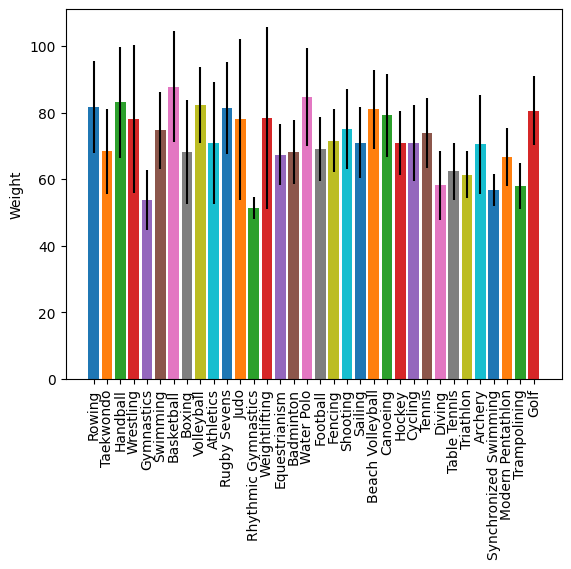

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

sports = unique_sports

# Loop through each sport
for sport in sports:
    # Select data for this specific sport
    sport_data = summer_2016_medals[summer_2016_medals["Sport"] == sport]
    
    # Create a bar with mean weight and std as error bar
    ax.bar(sport, sport_data["Weight"].mean(), 
           yerr=sport_data["Weight"].std())

# Add labels and formatting
ax.set_ylabel("Weight")
ax.set_xticks(range(len(sports)))
ax.set_xticklabels(sports, rotation=90)

# Save the figure to a file
fig.savefig("datasets/sports_weights.png")